## 공동주택 통합 매매 실거래가격지수
* 지수 (2017.11 = 100.0)
* http://kosis.kr/statisticsList/statisticsListIndex.do?menuId=M_01_01&vwcd=MT_ZTITLE

In [1]:
import pandas as pd

In [2]:
raw = pd.read_csv("data/공동주택_통합_매매_실거래가격지수_20200714200314.csv", encoding="cp949")

In [3]:
raw.shape

(10, 173)

In [4]:
raw.head()

,행정구역(1),2006. 01,2006. 02,2006. 03,2006. 04,2006. 05,2006. 06,2006. 07,2006. 08,2006. 09,...,2019. 07,2019. 08,2019. 09,2019. 10,2019. 11,2019. 12,2020. 01,2020. 02,2020. 03,2020. 04 p)
0,행정구역(1),지수 (2017.11 = 100.0),지수 (2017.11 = 100.0),지수 (2017.11 = 100.0),지수 (2017.11 = 100.0),지수 (2017.11 = 100.0),지수 (2017.11 = 100.0),지수 (2017.11 = 100.0),지수 (2017.11 = 100.0),지수 (2017.11 = 100.0),...,지수 (2017.11 = 100.0),지수 (2017.11 = 100.0),지수 (2017.11 = 100.0),지수 (2017.11 = 100.0),지수 (2017.11 = 100.0),지수 (2017.11 = 100.0),지수 (2017.11 = 100.0),지수 (2017.11 = 100.0),지수 (2017.11 = 100.0),잠정 증감률 (%)
1,전국,59.7,60.2,60.9,61.3,61.8,62.3,62.7,63.9,65.2,...,101.4,101.8,102.3,103.0,104.5,105.2,106.0,107.6,108.1,0.10
2,수도권,60.6,61.4,62.4,63.1,63.8,64.3,64.9,66.4,68.2,...,107.3,107.8,108.5,109.7,111.2,112.1,113.2,115.7,116.5,-0.12
3,지방,58.6,58.7,58.8,58.8,58.8,59.6,59.6,60.0,60.4,...,94.8,95.2,95.4,95.6,96.9,97.5,97.9,98.5,98.7,0.39
4,서울,56.7,57.5,58.9,59.9,60.0,60.3,61.0,62.5,63.9,...,116.9,117.9,119.1,120.8,123.2,124.0,125.0,127.3,127.6,-0.94


In [5]:
raw = raw.drop(0)

In [6]:
df = raw.melt(id_vars="행정구역(1)")
df.columns = ["지역", "기간", "실거래가격지수"]

In [7]:
df["실거래가격지수"] = pd.to_numeric(df["실거래가격지수"])

In [8]:
df["연도"] = df["기간"].str.split(".", expand=True)[0].astype(int)
df["분기"] = df["기간"].str.split(".", expand=True)[1]
df.head()

,지역,기간,실거래가격지수,연도,분기
0,전국,2006. 01,59.7,2006,01
1,수도권,2006. 01,60.6,2006,01
2,지방,2006. 01,58.6,2006,01
3,서울,2006. 01,56.7,2006,01
4,인천,2006. 01,55.1,2006,01


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역       1548 non-null   object 
 1   기간       1548 non-null   object 
 2   실거래가격지수  1548 non-null   float64
 3   연도       1548 non-null   int64  
 4   분기       1548 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 60.6+ KB


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font="AppleGothic")

Text(0.5, 1.0, '연도별 실거래 가격지수 2017.11 = 100.0')

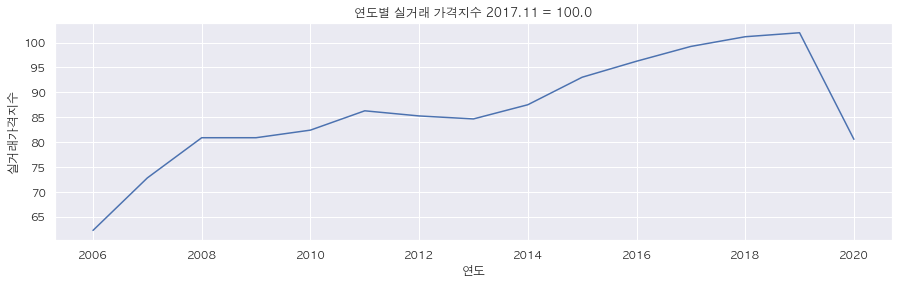

In [11]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df, x="연도", y="실거래가격지수", ci=None).set_title("연도별 실거래 가격지수 2017.11 = 100.0")

Text(0.5, 1.0, '연도별 실거래 가격지수 2017.11 = 100.0')

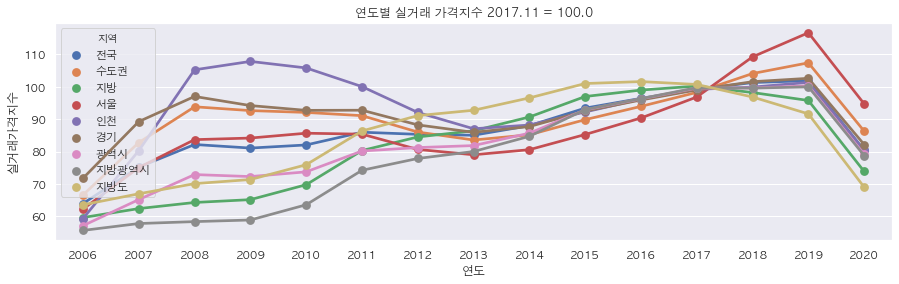

In [12]:
plt.figure(figsize=(15, 4))
sns.pointplot(data=df, x="연도", y="실거래가격지수", ci=None, hue="지역").set_title("연도별 실거래 가격지수 2017.11 = 100.0")

In [13]:
df["지역"].unique()

array(['전국', '수도권', '지방', '서울', '인천', '경기', '광역시', '지방광역시', '지방도'],
      dtype=object)

In [14]:
df_local = df[df["지역"].isin(["수도권", "지방"])]

Text(0.5, 1.0, '연도별 실거래 가격지수 2017.11 = 100.0')

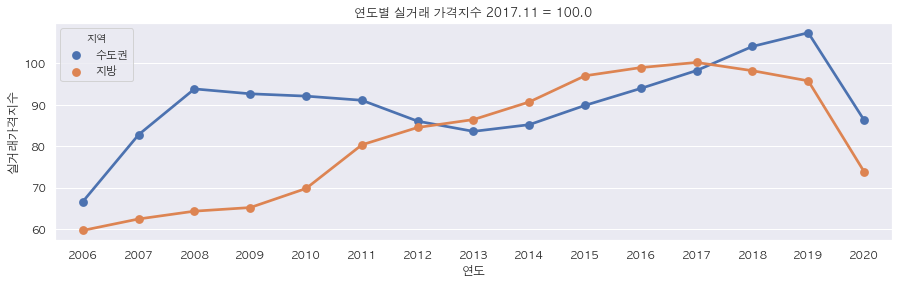

In [15]:
plt.figure(figsize=(15, 4))
sns.pointplot(data=df_local, x="연도", y="실거래가격지수", ci=None, hue="지역").set_title("연도별 실거래 가격지수 2017.11 = 100.0")